In [1]:
import random
import glob
import pandas as pd
import numpy as np

In [87]:
import matplotlib as mpl

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
!unzip -q /home/user/Desktop/Stocks/Small_Cap.zip -d /home/user/Desktop/Stocks/
!unzip -q /home/user/Desktop/Stocks/Mid_Cap\(1\).zip -d /home/user/Desktop/Stocks/
!unzip -q /home/user/Desktop/Stocks/Large_Cap\(1\).zip -d /home/user/Desktop/Stocks/

## Selecting 30 files randomly

In [17]:
files1 = (glob.glob('/home/user/Desktop/Stocks/Small_Cap/*'))
files2 = (glob.glob('/home/user/Desktop/Stocks/Mid_Cap//*'))
files3 = (glob.glob('/home/user/Desktop/Stocks/Large_Cap//*'))

In [175]:
random.shuffle(files1)
random.shuffle(files2)
random.shuffle(files3)

In [176]:
closes = []
names = []

In [177]:
for i,j,k in zip(files1[:10],files2[:10],files3[:10]):
    closes.append(pd.read_csv(i)['Close Price'])
    names.append(i.split('/')[-1].split('.')[0])
    closes.append(pd.read_csv(j)['Close Price'])
    names.append(j.split('/')[-1].split('.')[0])
    closes.append(pd.read_csv(k)['Close Price'])
    names.append(k.split('/')[-1].split('.')[0])

In [178]:
data = pd.DataFrame()

In [179]:
for i,j in zip(names,closes):
    data[i] = j

In [180]:
data.head()

,SONATSOFTW,IDBI,HDFCBANK,BAJAJELEC,NBCC,INFY,LALPATHLAB,MINDTREE,EICHERMOT,RAYMOND,...,MARUTI,IDFC,MRPL,LT,LEMONTREE,VOLTAS,BPCL,BOMDYEING,GODREJIND,M&M
0,162.65,75.05,1553.40,341.15,197.60,951.55,900.60,509.45,28930.60,772.80,...,6823.90,63.70,134.2,1742.40,71.65,431.85,727.85,82.20,578.55,1375.65
1,158.60,76.65,1583.00,347.00,198.25,955.00,910.95,511.30,29362.50,785.00,...,6953.95,64.25,131.7,1740.70,66.85,432.45,733.30,83.40,584.80,1366.35
2,158.25,75.95,1559.65,349.85,200.35,952.80,911.70,506.35,29093.55,783.65,...,6958.20,63.35,135.1,1755.45,66.95,430.20,727.45,82.25,588.60,1378.80
3,157.40,69.95,1557.15,334.10,194.20,961.75,909.75,492.90,28357.30,746.95,...,6831.05,61.50,136.1,1722.60,66.40,414.10,714.90,78.95,574.60,1352.85
4,151.90,68.75,1600.00,336.20,193.55,957.95,910.25,497.50,27936.05,723.10,...,6790.55,61.15,133.6,1724.55,67.70,415.75,702.45,77.15,578.00,1333.40


In [181]:
data.shape

(494, 30)

In [182]:
data.isna().sum()

SONATSOFTW      0
IDBI            0
HDFCBANK        0
BAJAJELEC       0
NBCC            0
INFY            0
LALPATHLAB      0
MINDTREE        0
EICHERMOT       0
RAYMOND         0
BERGEPAINT      0
RELIANCE        0
IRCON         343
GMRINFRA        0
HINDUNILVR      0
VENKEYS         0
CASTROLIND      0
ADANIPORTS      0
LUXIND          0
IGL             0
MARUTI          0
IDFC            0
MRPL            0
LT              0
LEMONTREE     224
VOLTAS          0
BPCL            0
BOMDYEING       0
GODREJIND       0
M&M             0
dtype: int64

## Calculating Annual Returns and Volatility

In [183]:
ret = pd.DataFrame()
ret['Annual Returns'] = data.pct_change().dropna().mean()*252
ret['Volatility'] = data.pct_change().dropna().std()*np.sqrt(252)

In [184]:
ret.head()

,Annual Returns,Volatility
SONATSOFTW,0.456258,0.401937
IDBI,-0.296008,0.453787
HDFCBANK,0.166872,0.256821
BAJAJELEC,0.316053,0.402414
NBCC,-0.515176,0.508672


## Plotting the elbow curve (observed values = 5,10)

In [145]:
dist = []
for e in range(2,15):
    km = KMeans(n_clusters=e)
    km.fit(ret)
    dist.append(km.inertia_)

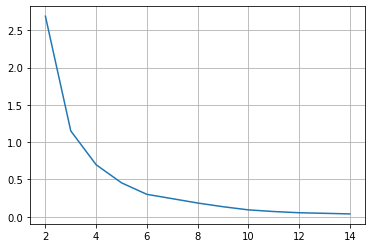

In [54]:
plt.plot(range(2,15),dist)
plt.grid(True)

In [195]:
cols = ['r','g','b','y','c','m','brown','gold','orange','pink','crimson','lime','gray','lightcoral','royalblue','lawngreen','maroon']

## Fitting KMeans on multiple values

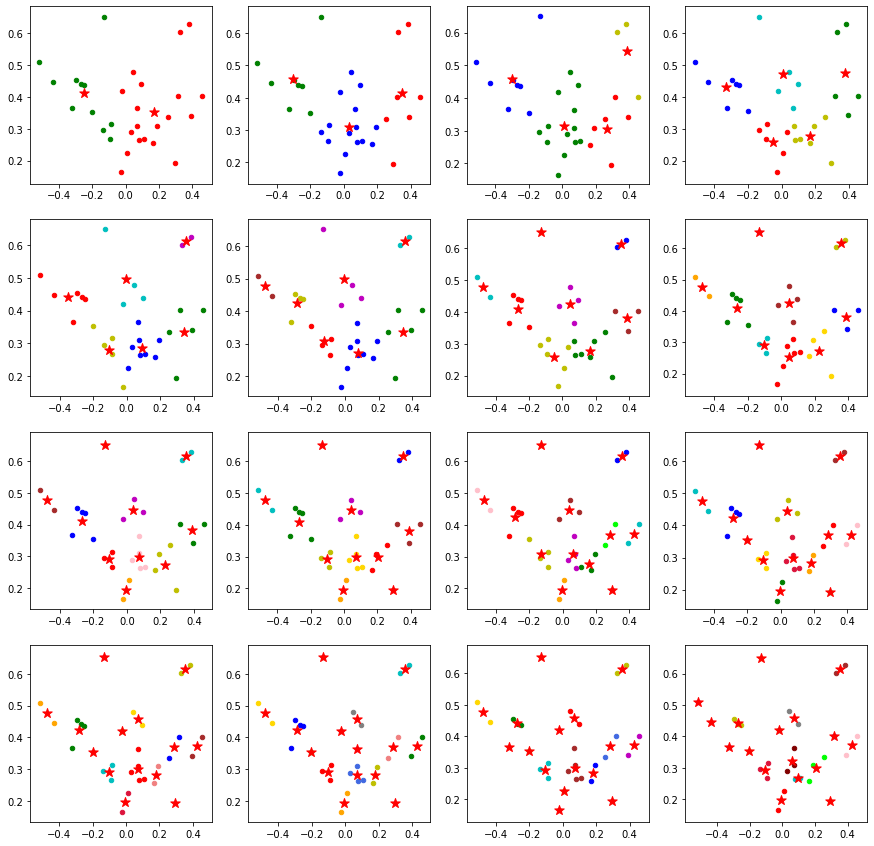

In [210]:
n = 2
fig,axes = plt.subplots(4,4,figsize = (15,15))
results = []
for i in range(4):
    for j in range(4):
        km = KMeans(n_clusters=n)
        km.fit(ret)
        pred = km.predict(ret)
        results.append(pred)
        for x in range(n):
            #print(x,i,j)
            axes[i][j].scatter(ret[pred==x]['Annual Returns'],ret[pred==x]['Volatility'],c = cols[x],s = 20)
        axes[i][j].scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker = '*',c = 'red',s = 100,label = 'centroids')
        n+=1
plt.show()

## KMeans for 5 clusters

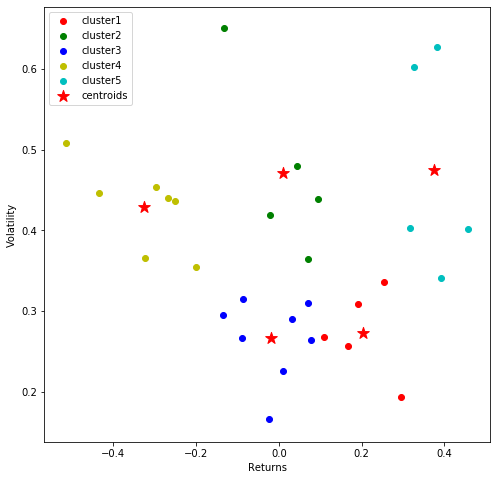

In [211]:
model = KMeans(5)
km = model.fit_predict(ret)
plt.figure(figsize = (8,8))
for i in range(5):
    plt.scatter(ret[km==i]['Annual Returns'],ret[km==i]['Volatility'],c = cols[i],label = 'cluster'+str(i+1))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker = '*',s = 150,c = 'r',label = 'centroids')
plt.xlabel('Returns')
plt.ylabel('Volatility')
plt.legend()

In [212]:
c5 = km

## KMeans for 10 clusters

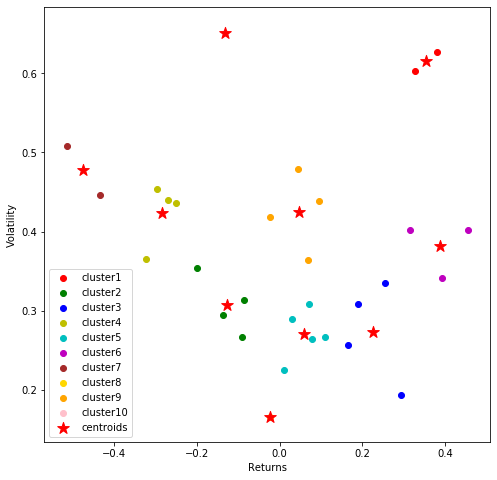

In [214]:
model = KMeans(10)
km = model.fit_predict(ret)
plt.figure(figsize = (8,8))
for i in range(10):
    plt.scatter(ret[km==i]['Annual Returns'],ret[km==i]['Volatility'],c = cols[i],label = 'cluster'+str(i+1))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker = '*',s = 150,c = 'r',label = 'centroids')
plt.xlabel('Returns')
plt.ylabel('Volatility')
plt.legend()

In [215]:
c10 = km

In [216]:
ret['Cluster (5)'] = c5
ret['Cluster (10)'] = c10

In [217]:
ret.head(10)

,Annual Returns,Volatility,Cluster (5),Cluster (10)
SONATSOFTW,0.456258,0.401937,4,5
IDBI,-0.296008,0.453787,3,3
HDFCBANK,0.166872,0.256821,0,2
BAJAJELEC,0.316053,0.402414,4,5
NBCC,-0.515176,0.508672,3,6
INFY,-0.022672,0.418963,1,8
LALPATHLAB,0.078122,0.264419,2,4
MINDTREE,0.392570,0.341485,4,5
EICHERMOT,-0.136246,0.294935,2,1
RAYMOND,0.070021,0.363834,1,8
